## 案例：岩心分析

Load the data（Core data）

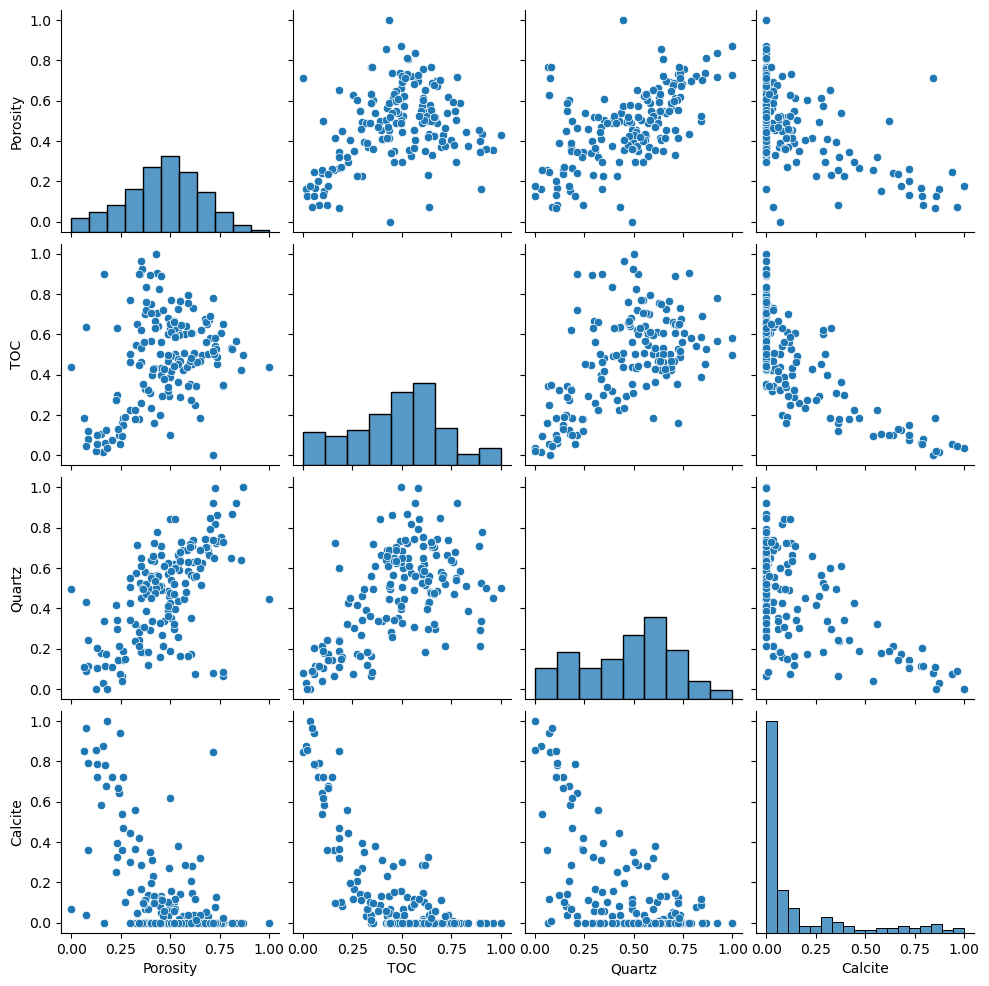

In [62]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Seaborn works well with pandas objects and not numpy. I think I like R better
import pandas as pd
from sklearn import preprocessing
f = open('CleanedUpCoreData.dat', 'r')
data = np.genfromtxt(f, skip_header=1) 
f.close()
extractedData1 = data[:, [1, 2, 3, 4]]
#rescale the data 
min_max_scaler= preprocessing.MinMaxScaler()
extractedData = min_max_scaler.fit_transform(extractedData1)
dataframe = pd.DataFrame(data = extractedData[:,:], columns = ['Porosity','TOC', 'Quartz','Calcite'])
sns.pairplot(dataframe)
plt.show()

K-Means

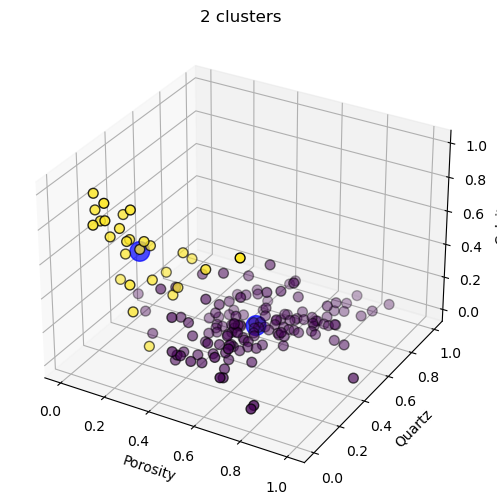

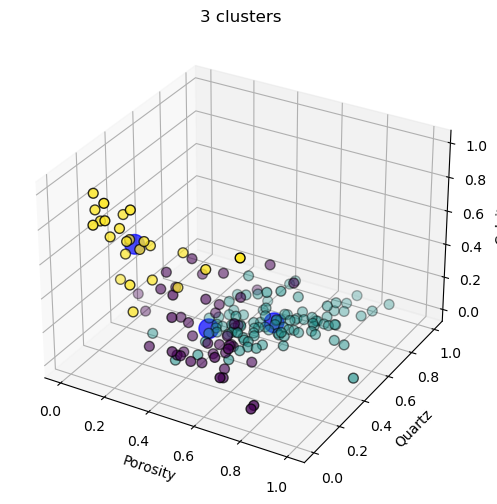

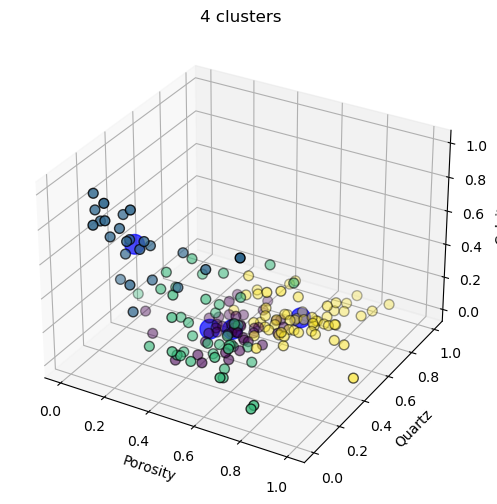

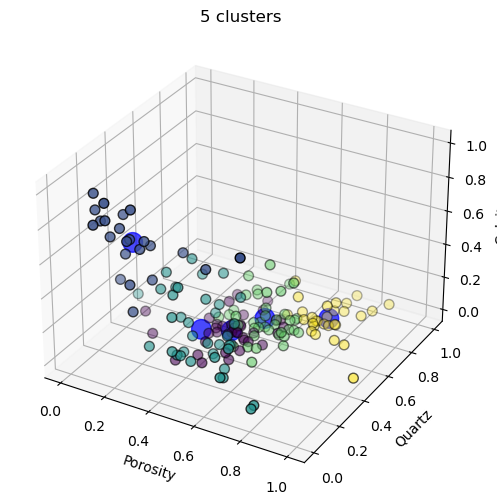

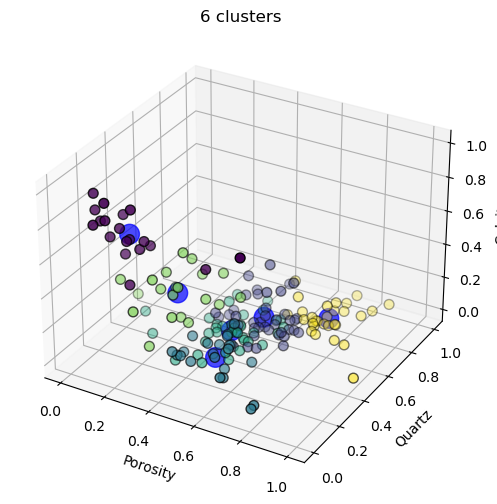

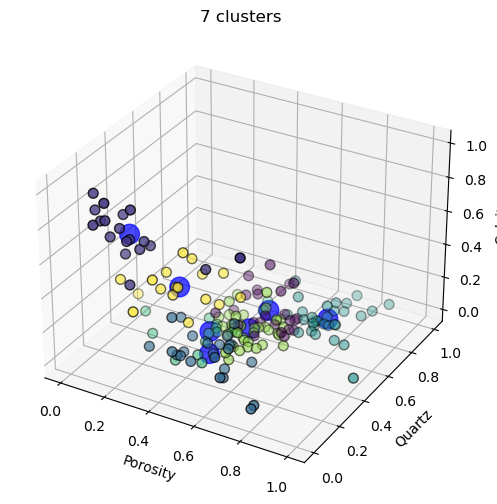

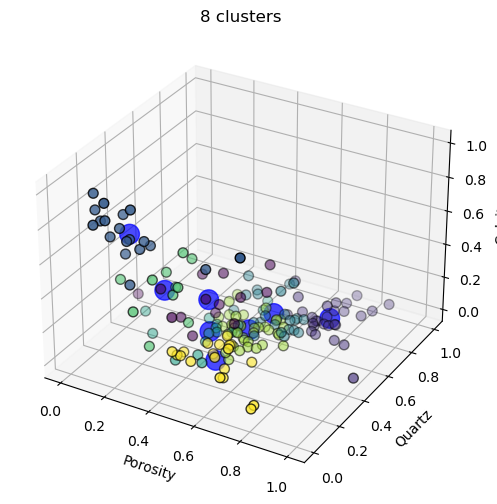

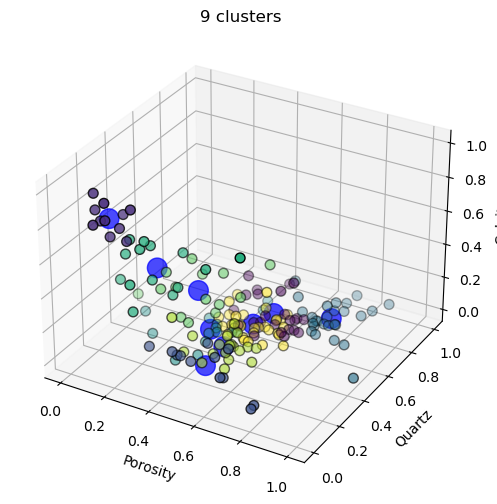

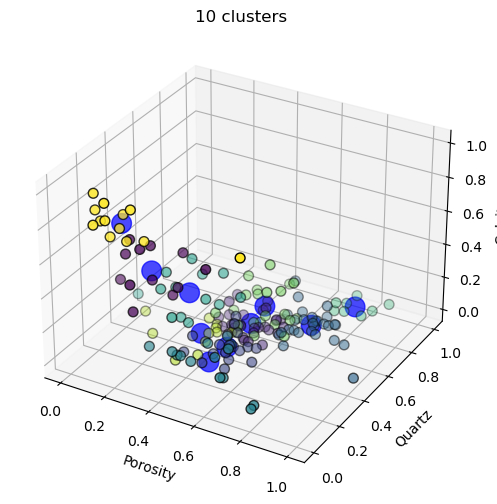

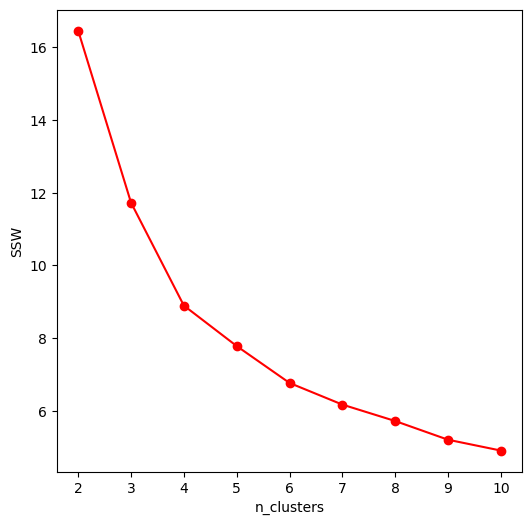

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
SSW = []
fignum = 1
n_clusters=[2,3,4,5,6,7,8,9,10]
for i in n_clusters:
   kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300)
   kmeans.fit(extractedData)
   classlabel = kmeans.predict(extractedData)
   centers = kmeans.cluster_centers_
# Store the SSW 
   SSW.append(kmeans.inertia_)
# 3D plot
   fig = plt.figure(fignum, figsize=(6, 6))
   ax = fig.add_subplot(111, projection='3d')
   ax.scatter(extractedData[:, 0], extractedData[:, 2], extractedData[:, 3], c=classlabel, s = 50, edgecolor='k')
   ax.scatter(centers[:, 0], centers[:, 2],centers[:, 3], c='blue', s=200, alpha=0.7)
   ax.set_xlabel('Porosity')
   ax.set_ylabel('Quartz')
   ax.set_zlabel('Calcite')
   ax.set_title('%i clusters'%i)
   #ax.dist = 12
   fignum = fignum+1
# plot the relationship between SSW and n_cluster
m=len(n_clusters)
fig = plt.figure(m+1, figsize=(6, 6))
ax1=fig.add_subplot(111)
ax1.plot(n_clusters,SSW,'ro-')
ax1.set_xlabel('n_clusters')
ax1.set_ylabel('SSW')
plt.show()

The Best cluster numbers is 3, which means the facies are 3

# 案例分析2：测井曲线

Load well Log Data

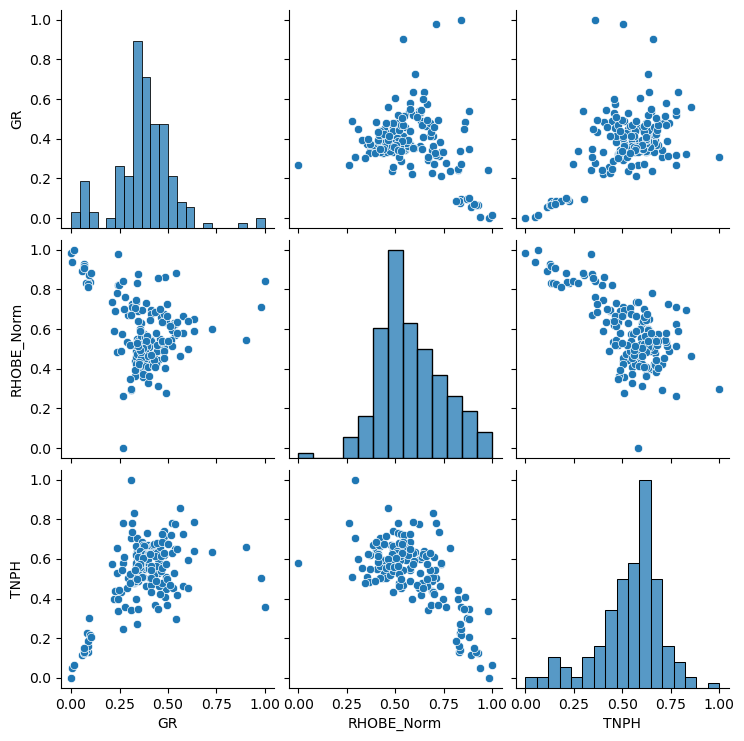

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Seaborn works well with pandas objects and not numpy. I think I like R better
import pandas as pd
from sklearn import preprocessing
f = open('LogDatatoTrainSVM.dat', 'r')
data = np.genfromtxt(f, skip_header=1) 
f.close()
extractedData1 = data[:, [1, 2, 3]]
#rescale the data 
min_max_scaler= preprocessing.MinMaxScaler()
extractedData = min_max_scaler.fit_transform(extractedData1)
dataframe = pd.DataFrame(data = extractedData[:,:], columns = ['GR','RHOBE_Norm', 'TNPH'])
sns.pairplot(dataframe)
plt.show()

K Means 

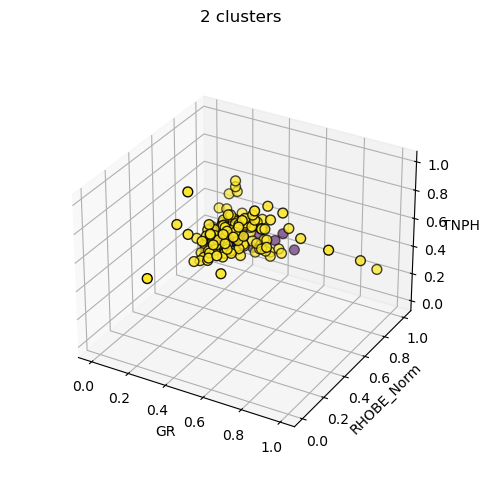

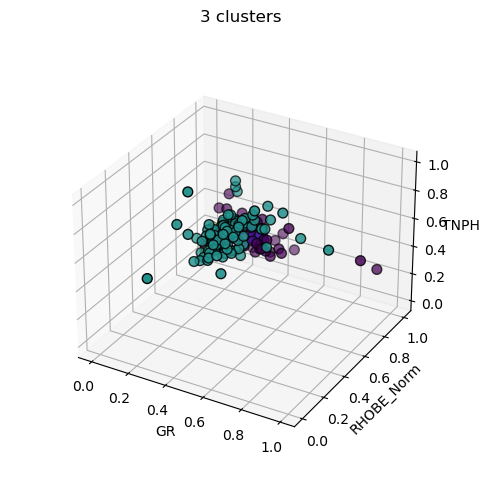

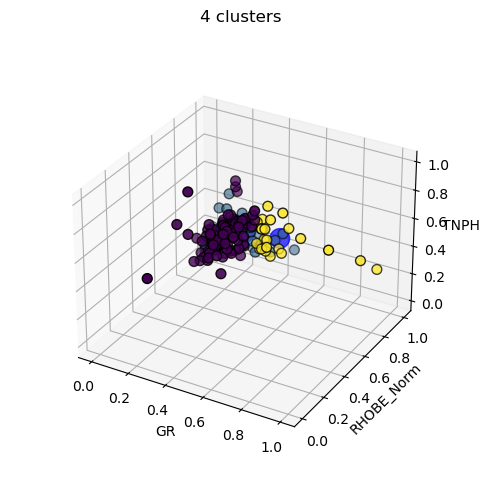

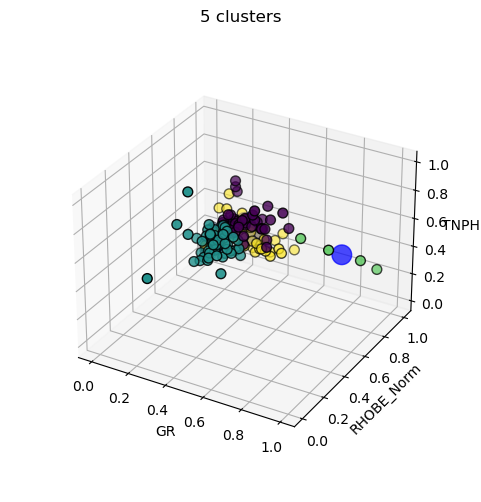

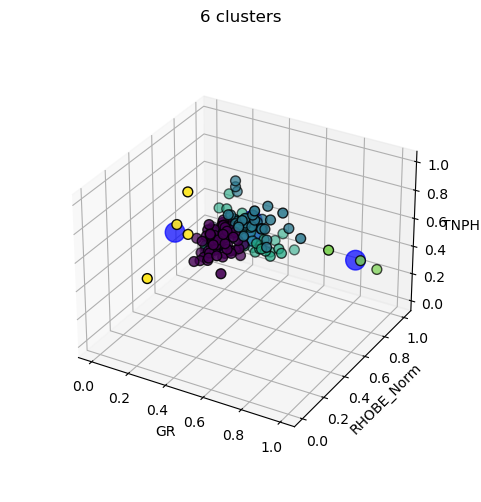

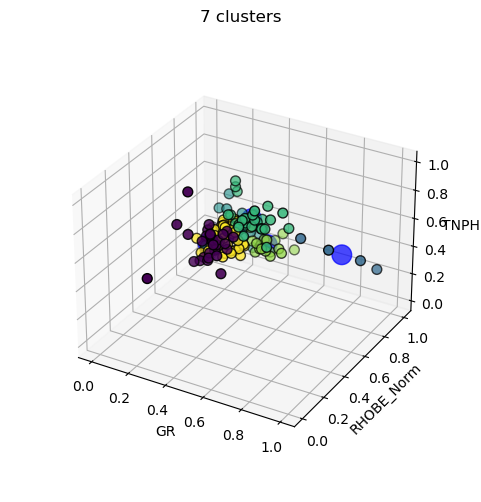

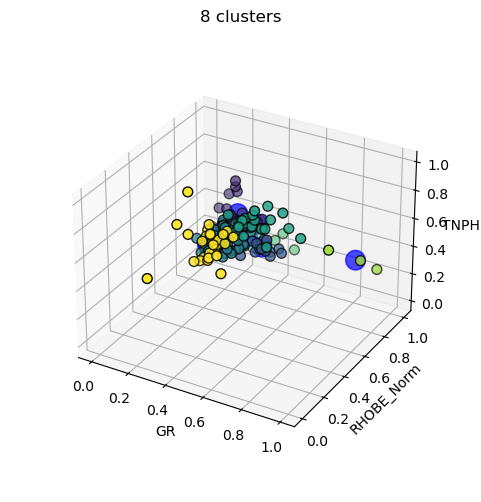

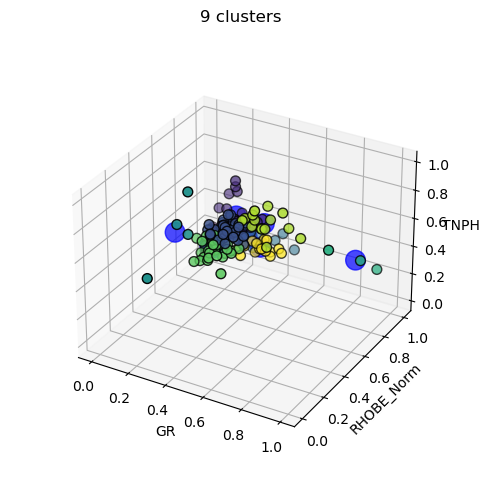

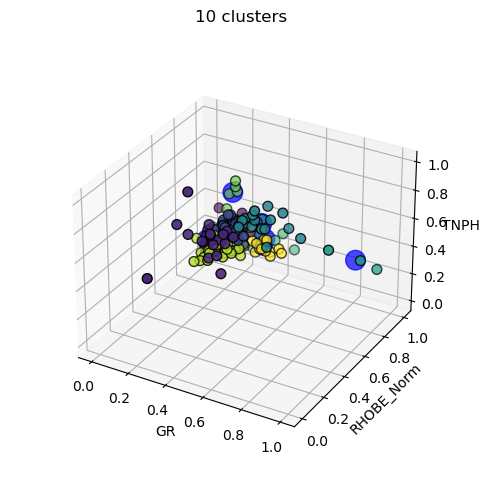

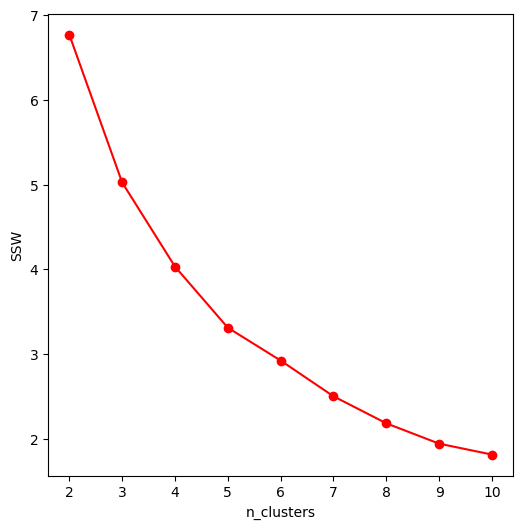

In [67]:
from sklearn.cluster import KMeans
SSW = []
fignum = 1
n_clusters=[2,3,4,5,6,7,8,9,10]
for i in n_clusters:
   kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300)
   kmeans.fit(extractedData)
   classlabel = kmeans.predict(extractedData)
   centers = kmeans.cluster_centers_
# Store the SSW 
   SSW.append(kmeans.inertia_)
# 3D plot
   fig = plt.figure(fignum, figsize=(6, 6))
   ax = fig.add_subplot(111, projection='3d') #3D plot 
   ax.scatter(extractedData[:, 0], extractedData[:, 1], extractedData[:, 2], c=classlabel, s = 50, edgecolor='k')
   ax.scatter(centers[:, 0], centers[:, 1],centers[:, 2], c='blue', s=200, alpha=0.7)
   ax.set_xlabel('GR')
   ax.set_ylabel('RHOBE_Norm')
   ax.set_zlabel('TNPH')
   ax.set_title('%i clusters'%i)
   ax.dist = 12
   fignum = fignum+1
#plt.savefig('test2.png',dpi=300,bbox_inches='tight',transparent=True)
# plot the relationship between SSW and n_cluster
m=len(n_clusters)
fig = plt.figure(m+1, figsize=(6, 6))
ax1=fig.add_subplot(111)
ax1.plot(n_clusters,SSW,'ro-')
ax1.set_xlabel('n_clusters')
ax1.set_ylabel('SSW')
plt.show()

The outcome shows 3 facies are ok. 

# Bonus Time：
## Next step, we will use 3 clusters to classify the data, and add the target rocktype into the dataframe.

,GR,RHOBE_Norm,TNPH,Facies
0,0.268730,0.000000,0.579310,0
1,0.307620,0.292978,0.706897,0
2,0.341390,0.423729,0.703448,0
3,0.236965,0.484262,0.527586,0
4,0.261776,0.576271,0.544828,0
...,...,...,...,...
162,0.434901,0.687651,0.368966,2
163,0.458195,0.699758,0.420690,2
164,0.602237,0.641646,0.455172,2
165,0.496085,0.723971,0.368966,2


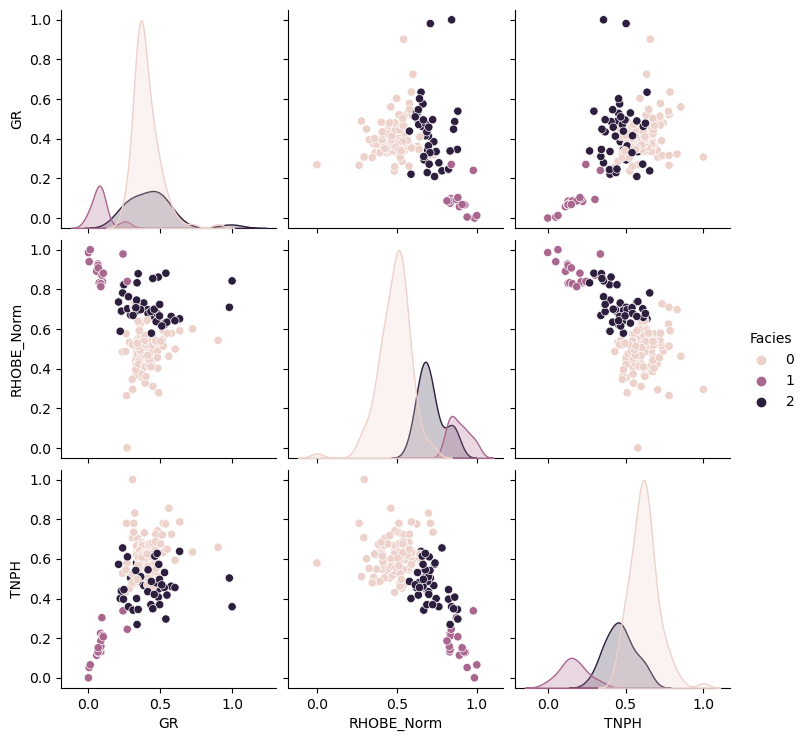

In [78]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(extractedData)
classlabel = kmeans.predict(extractedData)
# print (classlabel)
dataframe["Facies"] =classlabel  
display(dataframe)
sns.pairplot(dataframe, hue = "Facies") # Create a matrix scatterplot
plt.savefig('test1.png',dpi=300,bbox_inches='tight',transparent=True)
plt.show()

# Supervised Method-Support Vector Machines

In [69]:
# Import the SVM library
from sklearn.svm import NuSVC
from sklearn.svm import SVC
LogData=dataframe.iloc[:,0:3]
RockType=dataframe.iloc[:,3]
X = LogData
y = RockType
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # 80% of our datset will be used for training
X_train

,GR,RHOBE_Norm,TNPH
82,0.478010,0.503632,0.620690
33,0.266218,0.263923,0.779310
130,0.345747,0.513317,0.565517
126,0.413277,0.467312,0.562069
48,0.337904,0.404358,0.634483
...,...,...,...
23,0.057202,0.891041,0.113793
97,0.393529,0.523002,0.620690
44,0.341384,0.547215,0.637931
40,0.068486,0.907990,0.151724


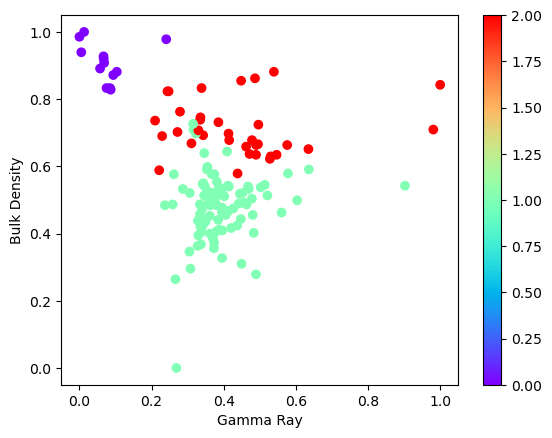

In [70]:
plt.scatter(X_train.iloc[:, 0],X_train.iloc[:, 1], c=y_train, cmap='rainbow') 
plt.xlabel('Gamma Ray')
plt.ylabel('Bulk Density')
plt.colorbar()
plt.show()

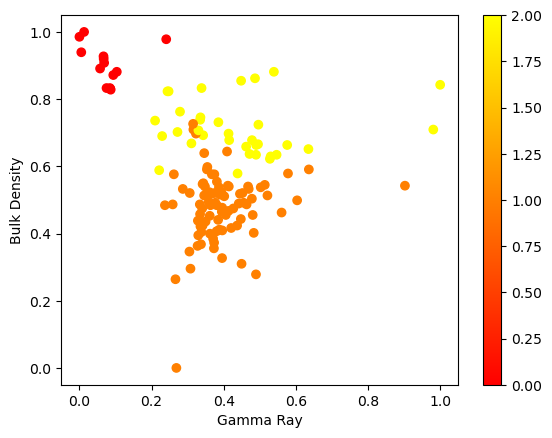

In [71]:
classifier = SVC(C = 1.0, kernel = 'rbf', gamma = 'scale', ) # Define the SVM model parameters 
classifier.fit(X_train, y_train) # Fit a classifier to the training data using y-labels corresponding to properties stored in X.
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='autumn')
plt.xlabel('Gamma Ray')
plt.ylabel('Bulk Density')
plt.colorbar()
#print(classifier.support_)
#print(classifier.support_vectors_)
plt.show()

In [80]:
y_pred = classifier.predict(X_test) # Predict the labels for the text X data
# If you do a train/test split, create a confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[ 2  0  1]
 [ 0 22  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.96      0.98        23
           2       0.80      1.00      0.89         8

    accuracy                           0.94        34
   macro avg       0.93      0.87      0.89        34
weighted avg       0.95      0.94      0.94        34



In [73]:
f = open('Well Logs for SVM_CorrectedPhi.dat', 'r')
newdata = np.genfromtxt(f, skip_header=1) 
f.close()
# I am only extracting the 3 relevant log data columns for getting labels using SVM
newLogData = newdata[:, [2, 3, 4]] 

In [74]:
from sklearn.preprocessing import StandardScaler
newX = newLogData
newX = StandardScaler().fit_transform(newX)
newRockType = classifier.predict(newX) # Predict the labels for the text X data

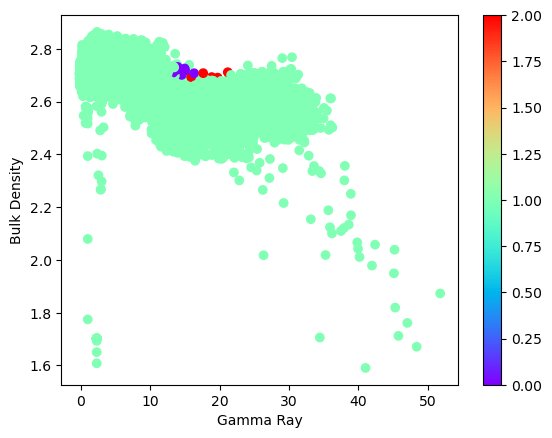

In [75]:
# Plot the GR versus Bulk Density and color the points by assigned rocktypes
plt.scatter(newLogData[:,2],newLogData[:,1], c=newRockType, cmap='rainbow')
plt.xlabel('Gamma Ray')
plt.ylabel('Bulk Density')
plt.colorbar()
plt.show()

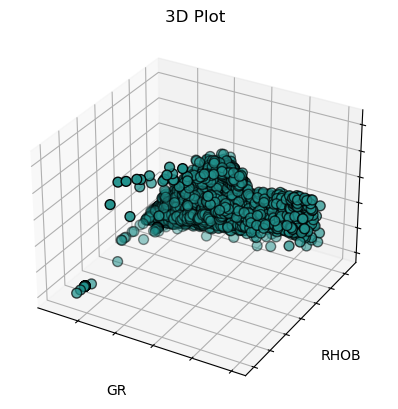

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = fig.add_subplot(projection='3d') #3D plot
ax.scatter(newLogData[:, 0], newLogData[:, 1], newLogData[:, 2], c=newRockType, s = 50, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('GR')
ax.set_ylabel('RHOB')
ax.set_zlabel('NPHI')
ax.set_title('3D Plot')
plt.show()